In [1]:
'''
scipy 패키지의 stats 모듈의 함수 
 1. 단순선형회귀모델 
 2. formula 형식의 다중선형회귀모델
'''
from scipy import stats
import pandas as pd


In [4]:
# 1. 단순 선형회귀분석(stats)

score_iq = pd.read_csv('C:/Users/hyebin/Desktop/Python_ML/data/score_iq.csv')
print(score_iq.info())

x = score_iq.iq # 독립변수  
y = score_iq.score # 종속변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sid      150 non-null    int64
 1   score    150 non-null    int64
 2   iq       150 non-null    int64
 3   academy  150 non-null    int64
 4   game     150 non-null    int64
 5   tv       150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB
None


In [5]:
score_iq.head()

,sid,score,iq,academy,game,tv
0,10001,90,140,2,1,0
1,10002,75,125,1,3,3
2,10003,77,120,1,0,4
3,10004,83,135,2,3,2
4,10005,65,105,0,4,4


In [6]:
model = stats.linregress(x, y)
print(model)
print('x 기울기 : ', model.slope) 
print('y 절편 :', model.intercept)
print('설명력 : ', model.rvalue)
print('p값 : ', model.pvalue) # F검정 통계량 
print('x 표준오차 :' , model.stderr)

LinregressResult(slope=0.6514309527270081, intercept=-2.856447122197551, rvalue=0.8822203446134705, pvalue=2.8476895206672287e-50, stderr=0.028577934409305377)
x 기울기 :  0.6514309527270081
y 절편 : -2.856447122197551
설명력 :  0.8822203446134705
p값 :  2.8476895206672287e-50
x 표준오차 : 0.028577934409305377


In [7]:
score_iq.head(1)

,sid,score,iq,academy,game,tv
0,10001,90,140,2,1,0


In [8]:
# score = 90, iq = 140
# [실습] 회귀방정식 : y = ax + b (a : 기울기, b : 절편)
y_pred = x[0] * model.slope + model.intercept
print('y의 예측치 : ', y_pred) # y의 예측치 :  88.3438862596
err = y[0] - y_pred
print('y 오차 :', err)

y의 예측치 :  88.34388625958358
y 오차 : 1.6561137404164157


In [11]:
# product.csv 
product = pd.read_csv('C:/Users/hyebin/Desktop/Python_ML/data/product.csv')
product.head()

,a,b,c
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2


In [14]:
# a:제품친밀도, b:제품적절성, c:제품만족도 
model2 = stats.linregress(product['b'], product['c'])
'''
x : 제품적절성 -> y : 제품만족도 
x = product['b']
y = product['c']
model2 = stats.linregress(x, y)
'''
print(model2)

LinregressResult(slope=0.7392761785971816, intercept=0.778858334470192, rvalue=0.7668526996408372, pvalue=2.2353448575493567e-52, stderr=0.038226055287175605)


In [16]:
print('x기울기 : ', model2.slope) 
print('y 절편 :', model2.intercept)
print('설명력 : ', model2.rvalue)
print('p값 : ', model2.pvalue)
print('x 표준오차 :' , model2.stderr)

x기울기 :  0.7392761785971816
y 절편 : 0.778858334470192
설명력 :  0.7668526996408372
p값 :  2.2353448575493567e-52
x 표준오차 : 0.038226055287175605


In [18]:
# [실습] 첫번째 관측치와 예측치의 오차 구하기 
product.head(1)

,a,b,c
0,3,4,3


In [19]:
y = 4*model2.slope + model2.intercept
print(y) # 3.73596304886
print('오차 : ', (y-3))

3.7359630488589186
오차 :  0.7359630488589186


In [23]:
# 3. formula 형식의 다중선형회귀모델 생성 
from statsmodels.formula.api import ols

wine = pd.read_csv('C:/Users/hyebin/Desktop/Python_ML/data/winequality-both.csv')
wine.columns = wine.columns.str.replace(' ', '_')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
# 상관계수 행렬 
print(wine.corr())

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [25]:
# chlorides() : 크롤라이드(염화물), citric_acid : 시트르산(구연산)
formula = 'quality ~ alcohol + chlorides + citric_acid'
#formula = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'

model = ols(formula, data=wine).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     590.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:56:43   Log-Likelihood:                -7554.8
No. Observations:                6497   AIC:                         1.512e+04
Df Residuals:                    6493   BIC:                         1.514e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5428      0.096     26.616      

In [26]:
print("\nCoefficients:\n%s" % model.params) # 계수값 
print("\nAdj. R-squared:\n%.2f" % model.rsquared_adj) # 조정된 R2 
print("\nF-statistic: %.1f  P-value: %.2f" % (model.fvalue, model.f_pvalue)) # F검정 
print("fitted values: %s" % (model.fittedvalues))


Coefficients:
Intercept      2.542755
alcohol        0.307923
chlorides     -2.399620
citric_acid    0.563065
dtype: float64

Adj. R-squared:
0.21

F-statistic: 590.0  P-value: 0.00
fitted values: 0       5.254864
1       5.325242
2       5.362162
3       5.695750
4       5.254864
          ...   
6492    6.061201
6493    5.588741
6494    5.445833
6495    6.600303
6496    6.342224
Length: 6497, dtype: float64


In [28]:
# 관측치 vs 예측치(통계치)
print(wine.quality.describe(),"\n")
print(model.fittedvalues.describe())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64 

count    6497.000000
mean        5.818378
std         0.404156
min         4.398997
25%         5.488487
50%         5.758651
75%         6.095609
max         7.266443
dtype: float64


In [30]:
# 관측치 vs 예측치(내용)
print(wine.quality[:100],"\n")
print(model.fittedvalues[:100])

0     5
1     5
2     5
3     6
4     5
     ..
95    6
96    5
97    5
98    5
99    6
Name: quality, Length: 100, dtype: int64 

0     5.254864
1     5.325242
2     5.362162
3     5.695750
4     5.254864
        ...   
95    6.471511
96    5.592775
97    5.348444
98    5.404619
99    5.223448
Length: 100, dtype: float64


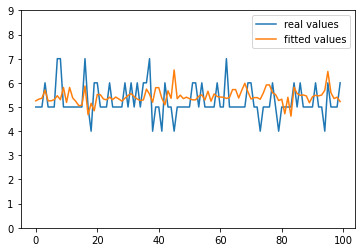

In [31]:
# 차트 보기 
import matplotlib.pyplot as plt
plt.plot(wine.quality[:100], label='real values') 
plt.plot(model.fittedvalues[:100], label='fitted values') 
plt.yticks(range(0, 10)) # y축 범위 
plt.legend()
plt.show() 